<a href="https://colab.research.google.com/github/debangeedas/SEM/blob/main/SEM_Final_Project_Implementation_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cellxgene-census

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.0 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=

# 1.Project problem statement
Project Problem Statement:
Alzheimer’s disease (AD) remains a significant challenge due to a limited understanding of the
gene expression changes that drive its progression and lack of effective therapies targeting
these mechanisms. While genes like RASGEF1B, SLC26A3, and LINGO1 are associated with
cellular stress response, synaptic stability, and neuroinflammation, their specific roles through
various Braak stages in AD are unclear. This project aims to address this knowledge gap by
using ML/AI data analysis to quantify and compare the expression levels of these genes in AD
patients versus normal subjects.
Our research questions include: How does the upregulation of these genes evolve across
disease stages, and what pathways do they influence that may drive cognitive decline. Our
contribution is to identify potential therapeutic targets by examining the cellular impacts of gene
dysregulation, with a goal to develop inhibitory strategies. This innovation holds promise for
early intervention and drug development, potentially reducing AD progression and associated
healthcare costs

## 1.1 About our Genes of Interest SLC26A3,RASGEF1B and LINGO1

1.SLC26A3 (ENSG00000091138): This gene is usually involved in transporting molecules across cell membranes. Alterations here could disrupt cellular processes, potentially affecting brain cell communication.

2.RASGEF1B (ENSG00000138670): This gene is part of the RAS gene family, which plays a role in cell growth and development. Changes in RAS signaling pathways have been linked to various brain diseases. In Alzheimer’s, if this pathway becomes faulty, it could contribute to abnormal cell growth or death.

LINGO1 (ENSG00000169783): Known to influence nerve growth and repair, this gene has been linked to neurodegenerative diseases. In Alzheimer’s, damage to nerve connections (synapses) is a hallmark. LINGO1 might play a role in how well the brain maintains or loses these connections

# 2.Data sets for Analysis

1. Inhibitory: Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s disease https://cellxgene.cziscience.com/e/9813a1d4-d107-459e-9b2e-7687be935f69.cxg/
2. Inhibitory: Molecular Signatures of Resilience to Alzheimer’s Disease in Neocortical Layer 4 Neurons https://cellxgene.cziscience.com/e/0ecea697-0f69-4d40-88e1-7f854e17e2b3.cxg/
3. Microglia-PVM - DLPFC: Seattle Alzheimer's Disease Atlas (SEA-AD) https://cellxgene.cziscience.com/e/100c6145-7b0e-4ba6-81c1-ffebed0d1ac4.cxg/

# 3.Box plot for initial Analysis with Genes for Interest
A box plot, also known as a box-and-whisker plot, is a statistical graph used to display the distribution of a dataset and summarize its key features. It provides insights into the data's range, central tendency (median), and variability, as well as any potential outliers

Load CellXgene Dataset for Box plot

DataSet used - Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s disease - Inhibitory https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad

In [ ]:
!pip install scanpy
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


Matched Genes (gene name: ID name):
SLC26A3: ENSG00000091138
RASGEF1B: ENSG00000138670
LINGO1: ENSG00000169783

Unmatched Genes:


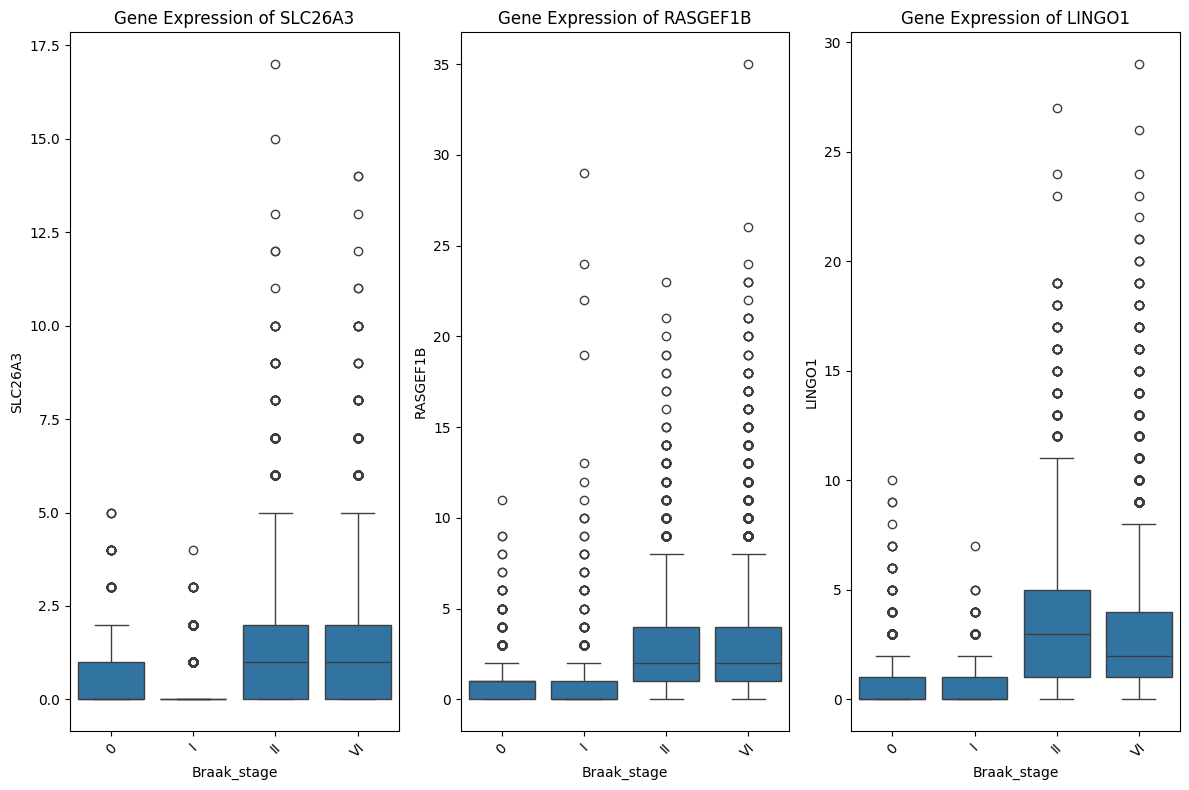

In [ ]:
# Braak Stage Vs Gene Expression of RAS ,LINCO, SCP
# Refer this
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Define the specific genes of interest
genes_of_interest = [
    "SLC26A3",
    "RASGEF1B",
    "LINGO1"
]

# Step 2: Create a mapping of feature names to Ensembl IDs using the index
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']  # This contains the gene name
    ensembl_id = index  # Use the index as the Ensembl ID
    gene_mapping[gene_name] = ensembl_id

# Step 3: Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Print matched and unmatched genes
print("Matched Genes (gene name: ID name):")
for gene, ensembl_id in matched_genes.items():
    print(f"{gene}: {ensembl_id}")

print("\nUnmatched Genes:")
for gene in unmatched_genes:
    print(gene)

# Step 4: Extract gene expression for the matched genes and Braak stages
expression_data = {}
for gene in matched_genes.keys():
    # Get the Ensembl ID for the gene
    ensembl_id = matched_genes[gene]

    # Fetch gene expression data (from raw or X depending on your setup)
    # Convert the sparse matrix to a dense numpy array and flatten it
    expression_data[gene] = adata.raw[:, ensembl_id].X.toarray().flatten()  # Convert to array and flatten

# Step 5: Get Braak stage information from `adata.obs['Braak']`
braak_stages = adata.obs['Braak']

# Step 6: Prepare data for plotting
# Convert expression data into a DataFrame for plotting
plot_data = pd.DataFrame({
    'Braak_stage': braak_stages,
    **{gene: expression_data[gene] for gene in matched_genes.keys()}  # No need to flatten here as it's already done
})

# Step 7: Visualize gene expression across Braak stages using a boxplot
plt.figure(figsize=(12, 8))
for idx, gene in enumerate(matched_genes.keys(), start=1):
    plt.subplot(1, 3, idx)
    sns.boxplot(data=plot_data, x='Braak_stage', y=gene)
    plt.title(f'Gene Expression of {gene}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


##3.1 Interpretation of Box Plot results:
The box plots in the image display gene expression levels of three genes (SLC26A3, RASGEF1B, and LINGO1) across different Braak stages (a measure of Alzheimer's disease progression, with higher stages indicating more severe disease).

1. Gene: SLC26A3
The median expression level is consistently low across Braak stages.
There are a few outliers, but no significant increase in expression as the Braak stage progresses.

2. Gene: RASGEF1B
The expression level increases with higher Braak stages.
The IQR and whiskers widen at later stages, suggesting increased variability in gene expression.


3. Gene: LINGO1
Expression levels increase noticeably with advancing Braak stages.
The data is more spread out at higher stages (larger IQR and whiskers), and several outliers indicate individuals with exceptionally high expression.




##3.2 Key Insights from Boxplot:
**Progression with Braak Stages:** While SLC26A3 shows minimal change across stages, RASGEF1B and LINGO1 exhibit a clear upward trend in gene expression as the disease progresses.

**Variability:** The increasing IQR and presence of outliers at higher Braak stages (for RASGEF1B and LINGO1) suggest that gene expression becomes more diverse as the disease advances.

**Potential Biomarkers:** RASGEF1B and LINGO1 might serve as potential biomarkers for tracking disease progression due to their dynamic changes.
These findings help in understanding how specific genes are linked to the severity of Alzheimer's disease and may guide future research into treatment or diagnosis.

# 4.Heat Map Analysis

<ipython-input-15-ce8b68deacfe>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_expression = expression_matrix.groupby(adata.obs['Braak']).mean()


Braak           VI
SLC26A3   1.210716
LINGO1    1.899750
RASGEF1B  2.036067


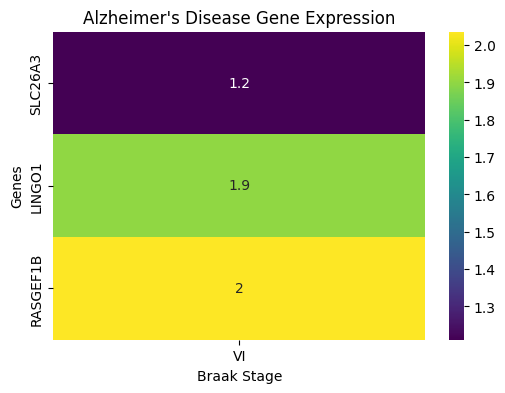

<ipython-input-15-ce8b68deacfe>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_expression = expression_matrix.groupby(adata.obs['Braak']).mean()


Braak            0         I        II
SLC26A3   0.414783  0.209638  1.262089
LINGO1    0.658507  0.374691  1.978028
RASGEF1B  0.681504  0.402055  1.879891


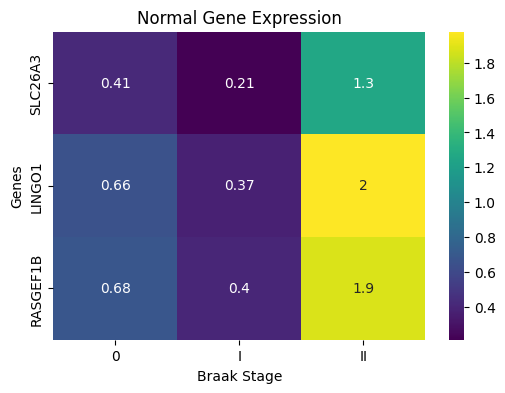

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_heatmap_and_matrix(adata, title):
  """Plots a heatmap and prints a matrix of gene expression for a given adata object."""

  # Create a matrix of gene expression values
  expression_matrix = adata.to_df()
  # Filter to only include genes of interest
  expression_matrix = expression_matrix[[gene_id for gene_id, gene_name in gene_mapping.items() if gene_name in genes_of_interest]]

  # Group by cell type and calculate the average expression for each gene
  grouped_expression = expression_matrix.groupby(adata.obs['Braak']).mean()
  # Transpose the matrix so that genes are represented by rows and cell types by columns
  matrix = grouped_expression.T
  # Rename rows using gene mapping
  matrix = matrix.rename(index={gene_id: gene_mapping[gene_id] for gene_id in matrix.index})
  # Print the matrix
  print(matrix)

  # Create a heatmap of gene expression
  plt.figure(figsize=(6, 4))
  sns.heatmap(matrix, annot=True, cmap="viridis")
  plt.title(title)
  plt.xlabel("Braak Stage")
  plt.ylabel("Genes")
  plt.show()

# Plot heatmaps and matrices for both datasets
plot_heatmap_and_matrix(adata_alzheimer, "Alzheimer's Disease Gene Expression")
plot_heatmap_and_matrix(adata_normal, "Normal Gene Expression")

<ipython-input-15-ce8b68deacfe>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_expression = expression_matrix.groupby(adata.obs['Braak']).mean()


Braak            0         I        II        VI
SLC26A3   0.414783  0.209638  1.262089  1.210716
LINGO1    0.658507  0.374691  1.978028  1.899750
RASGEF1B  0.681504  0.402055  1.879891  2.036067


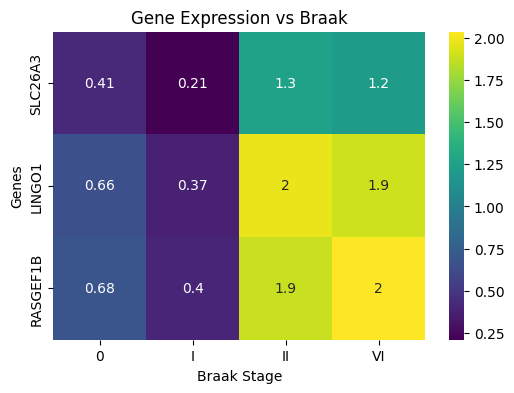

In [ ]:
plot_heatmap_and_matrix(adata_slice_genes, "Gene Expression vs Braak")

###Observation and comments
From the above data, the upregulation of the gene expressions is not very evident or consequent. For RASGEF1B, we do see consistent upregulation for Braak stages 1,2 and 6, but we do not observe the same for the rest.
This could be attributed to the following reasons:
1. Not enough samples (8 diseased + 8 normal people studied)
2. No sample with intermediate Braak stages like 3, 4 and 5.



#ML Models to Explore and Prove our Problem statement
1. Linear Regression
2. Random Forest
3. XGBoost

# 5.Linear Regression

## 1.Install Dependencies:
* The scanpy library (a popular tool for single-cell data analysis) is installed to handle and analyze the dataset. Other libraries, such as pandas, numpy, and matplotlib, are used for data manipulation and visualization.
Download and Load Dataset:
* A single-cell dataset in the .h5ad format is downloaded from a specified URL using urllib. The data is then loaded into a scanpy object (adata), which stores both metadata (e.g., Braak stages) and gene expression matrices.
Define Genes of Interest:
* A list of genes (SLC26A3, RASGEF1B, LINGO1) is provided. The script maps these gene names to their corresponding Ensembl IDs using the adata.var table, which contains information about the genes in the dataset.
Check Braak Stages:
* The unique Braak stages present in the dataset are printed. These stages indicate the progression of Alzheimer's pathology.
Map Braak Stages to Numerical Values:
* The categorical Braak stage labels (e.g., "I", "II", "VI") are mapped to numerical values (1-6) using a dictionary. This step facilitates numerical comparisons or regression analysis.
Extract Gene Expression Data:
* For each gene of interest, the script extracts raw gene expression values (stored in the .raw attribute of adata) across all cells. The expression data is flattened into a 1D array for further analysis.


In [ ]:
!pip install scanpy seaborn anndata
import urllib
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Download the dataset and load it using Scanpy
url = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Step 3: Define the genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "LINGO1"]

# Map gene names to Ensembl IDs
gene_mapping = {row['feature_name']: index for index, row in adata.var.iterrows()}
matched_genes = {gene: gene_mapping[gene] for gene in genes_of_interest if gene in gene_mapping}

# Step 4: Check unique values in the Braak stages
print("Unique Braak stages:", adata.obs['Braak'].unique())

# Step 5: Map categorical Braak stages to numerical values
braak_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
adata.obs['Braak_stage_num'] = adata.obs['Braak'].map(braak_mapping)

# Step 6: Extract gene expression data for the matched genes and Braak stages
expression_data = {}
for gene, ensembl_id in matched_genes.items():
    expression_data[gene] = adata.raw[:, ensembl_id].X.toarray().flatten()

## 2.Prepare data
1. Create a DataFrame:
    * A pandas DataFrame is constructed using:
        * The Braak stage numerical values (Braak_stage) as one column, extracted from adata.obs['Braak_stage_num'].
        * Gene expression values for the genes of interest (SLC26A3, RASGEF1B, LINGO1), which were stored earlier in the expression_data dictionary. These values are added as separate columns in the DataFrame.
2. Handle Missing Data:
    * The .dropna() method removes any rows that contain missing values (e.g., cells where the Braak stage or gene expression data is not available). This ensures the dataset is clean and suitable for regression analysis.

In [ ]:
# Prepare a DataFrame for the regression analysis
df = pd.DataFrame({
    'Braak_stage': adata.obs['Braak_stage_num'].astype(float),
    **{gene: expression_data[gene] for gene in matched_genes.keys()}
}).dropna()  # Drop any rows with missing values

## 3.Model Training
Iterate Through Genes:

The script loops through each gene in the matched_genes dictionary to perform a separate regression analysis for each.
Define Independent and Dependent Variables:

Independent Variable (X): A single-column DataFrame containing the expression levels of the current gene.
Dependent Variable (y): The numerical Braak stage values from the df DataFrame.
Fit a Linear Regression Model:

A LinearRegression model from sklearn is initialized and fitted using the gene expression data (X) and the Braak stages (y).
The model learns the relationship between the gene’s expression levels and Braak stage.
Store Regression Results:

For each gene, the following metrics are calculated and stored in the results dictionary:
Coefficient (coefficient): Indicates the strength and direction of the relationship between the gene expression and Braak stages.
Intercept (intercept): The predicted Braak stage when the gene expression is zero.
R-squared (r_squared): Represents how well the gene expression explains the variation in Braak stages (a measure of model fit).

In [ ]:
# Step 7: Perform Linear Regression for each gene
results = {}
for gene in matched_genes.keys():
    X = df[[gene]]
    y = df['Braak_stage']

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Store results
    results[gene] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r_squared': model.score(X, y)
    }

## 4.Print and Plot
This code first prints the results of the linear regression analysis for each gene, showing the coefficient (indicating the relationship's strength and direction), the intercept (predicted Braak stage when gene expression is zero), and the R-squared value (how well gene expression explains Braak stage variability). It then visualizes these relationships through scatterplots with regression lines, using subplots for each gene. The scatterplots display gene expression levels on the x-axis and Braak stages on the y-axis, with a fitted regression line (in red) illustrating the trend. This provides both numerical and visual insights into how the expression of each gene correlates with Alzheimer's progression.

Unique Braak stages: ['VI', 'II', '0', 'I']
Categories (4, object): ['0', 'I', 'II', 'VI']
Linear Regression Results:
SLC26A3: Coefficient = 0.20615781843662262, Intercept = 3.8025975227355957, R^2 = 0.018148555315761872
RASGEF1B: Coefficient = 0.1883184164762497, Intercept = 3.5547492504119873, R^2 = 0.05465178192670217
LINGO1: Coefficient = 0.1172732338309288, Intercept = 3.7493441104888916, R^2 = 0.02131915649453886


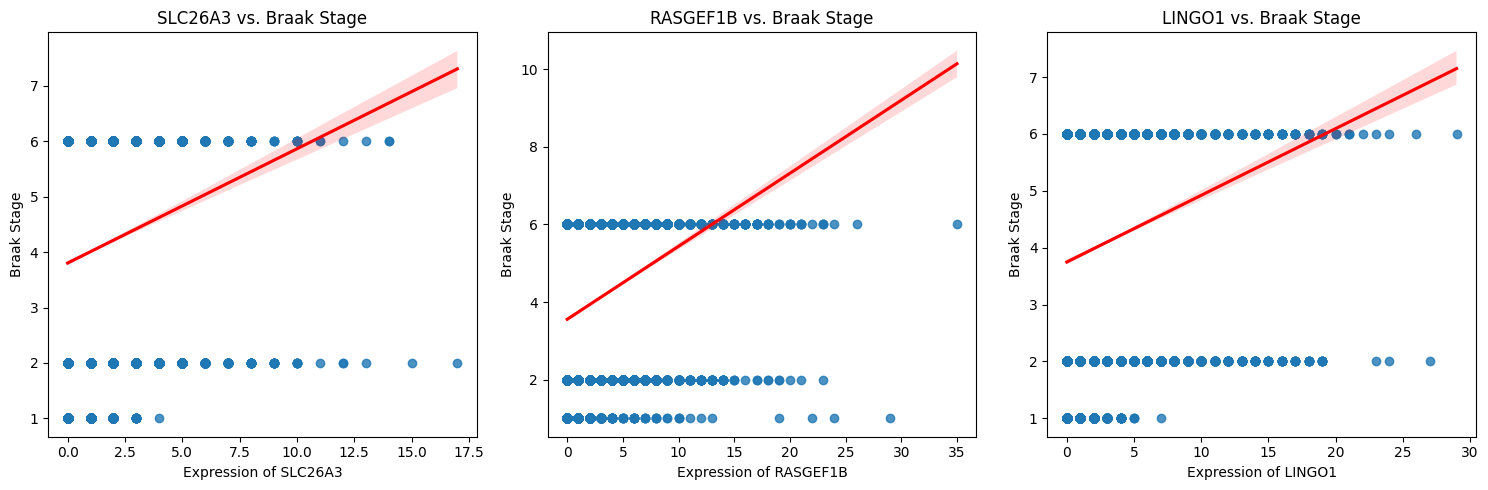

In [ ]:

# Print results
print("Linear Regression Results:")
for gene, result in results.items():
    print(f"{gene}: Coefficient = {result['coefficient']}, Intercept = {result['intercept']}, R^2 = {result['r_squared']}")

# Step 8: Plot the results
plt.figure(figsize=(15, 5))
for idx, gene in enumerate(matched_genes.keys(), start=1):
    plt.subplot(1, 3, idx)
    sns.regplot(x=gene, y='Braak_stage', data=df, line_kws={"color": "red"})
    plt.title(f'{gene} vs. Braak Stage')
    plt.xlabel(f'Expression of {gene}')
    plt.ylabel('Braak Stage')

plt.tight_layout()
plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.5 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=c97ccab5010cfccfb0d65284a1bc9dac92793c2427a0353b9347c44d3d5d7127
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
Unique Braak stages: ['II', 'VI', 'III', '0', 'IV', 'V', 'I']
Categories (7, object): ['0', 'I', 'II', 'III', 'IV', 'V', 'VI']
Linear Regression Results:
SLC26A3: Coefficient = 0.4204051494

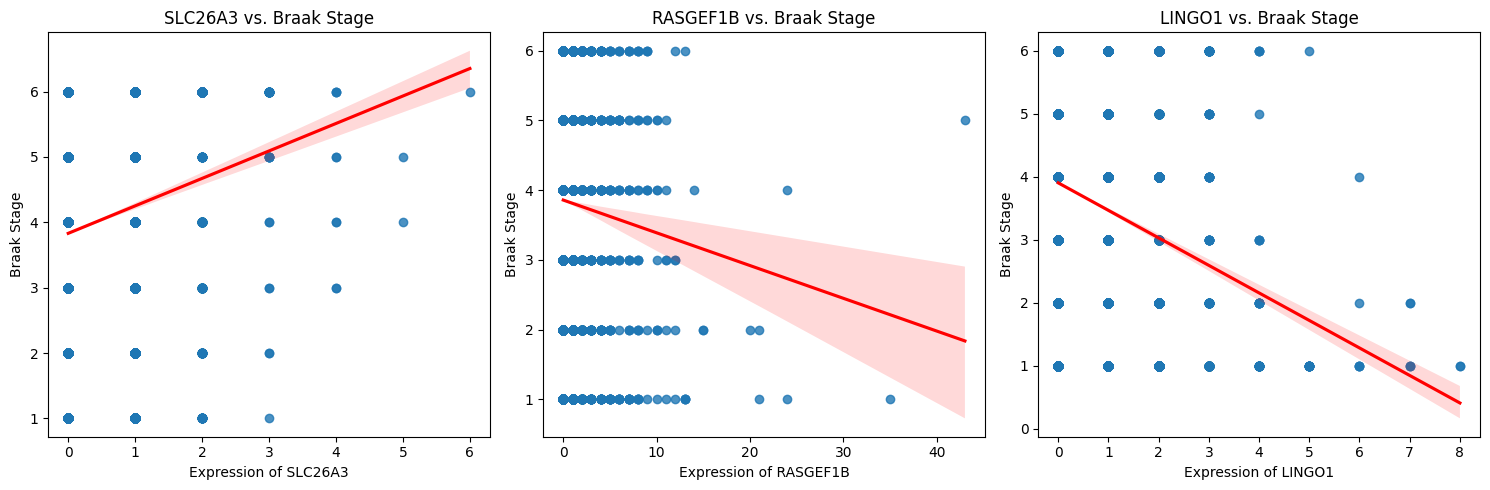

In [ ]:
!pip install scanpy
import urllib
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


# url = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
# urllib.request.urlretrieve(url, 'dataset.h5ad')

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/87158a0a-629f-47b4-9eec-2212686e1927.h5ad', 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

genes_of_interest = ["SLC26A3", "RASGEF1B", "LINGO1"]


gene_mapping = {row['feature_name']: index for index, row in adata.var.iterrows()}
matched_genes = {gene: gene_mapping[gene] for gene in genes_of_interest if gene in gene_mapping}

print("Unique Braak stages:", adata.obs['Braak.stage'].unique())


braak_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
adata.obs['Braak_stage_num'] = adata.obs['Braak.stage'].map(braak_mapping)

#Extract gene expression data for the matched genes and Braak stages
expression_data = {}
for gene, ensembl_id in matched_genes.items():
    expression_data[gene] = adata.raw[:, ensembl_id].X.toarray().flatten()

# Prepare a DataFrame for the regression analysis
df = pd.DataFrame({
    'Braak_stage': adata.obs['Braak_stage_num'].astype(float),
    **{gene: expression_data[gene] for gene in matched_genes.keys()}
}).dropna()

#Perform Linear Regression for each gene
results = {}
for gene in matched_genes.keys():
    X = df[[gene]]
    y = df['Braak_stage']

    model = LinearRegression()
    model.fit(X, y)


    results[gene] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r_squared': model.score(X, y)
    }


print("Linear Regression Results:")
for gene, result in results.items():
    print(f"{gene}: Coefficient = {result['coefficient']}, Intercept = {result['intercept']}, R^2 = {result['r_squared']}")

#Plot the results
plt.figure(figsize=(15, 5))
for idx, gene in enumerate(matched_genes.keys(), start=1):
    plt.subplot(1, 3, idx)
    sns.regplot(x=gene, y='Braak_stage', data=df, line_kws={"color": "red"})
    plt.title(f'{gene} vs. Braak Stage')
    plt.xlabel(f'Expression of {gene}')
    plt.ylabel('Braak Stage')

plt.tight_layout()
plt.show()

# 6.Random Forest
A Random Forest is a machine learning algorithm that combines multiple decision trees to make predictions. Each tree in the forest is trained on a random subset of the data and features, and the final prediction is made by averaging the results (for regression) or voting (for classification). This approach reduces overfitting and improves accuracy and robustness.

Gene expression data can be noisy and complex, with different genes contributing in varying ways. Random Forest handles this complexity well by considering multiple trees, each looking at slightly different aspects of the data, and averaging their predictions to reduce errors. It also tells which genes (features) are most important for predicting Braak stages, helping us identify which gene has the strongest link to disease progression.Even when some Braak stages are underrepresented, Random Forest combined with SMOTE (Synthetic Minority Oversampling Technique) helps balance the predictions.

Aim: The task is to predict the Braak stage of individuals (a measure of disease progression) based
on the expression levels of specific genes of interest SLC26A3, RASGEF1B, LINGO1.
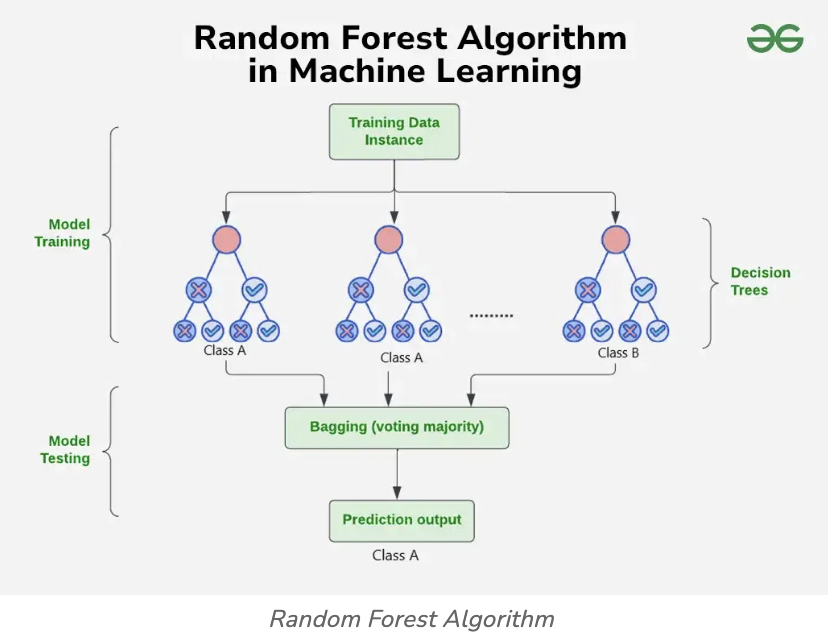

##6.1 Implementation steps

STEP 1 : Input Data
We provide the gene expression levels (LINGO1, RASGEF1B, SLC26A3) as input features (X).
The Braak stage (1.0, 2.0, 6.0) is the target output (y).

STEP 2 : Training
The Random Forest learns patterns in the gene expression data to predict the Braak stage.
During training, it builds multiple decision trees using subsets of the data.

STEP 3 : Prediction
For a new set of gene expression values, Random Forest predicts the Braak stage by
combining the predictions from all the trees (e.g., majority vote).

STEP 4: Interpretation
Feature importance scores show which genes (LINGO1, RASGEF1B, SLC26A3) contribute the
most to predicting the Braak stage. This insight is biologically valuable.

## 6.1.1 Implement Random forest on the CellXGene loaded Data set

Data set -  Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s disease - Inhibitory https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad

### 1.Data Preparation
Step 1: Extract Gene Expression Data
Extracts the gene expression data for the selected genes (matched using their Ensembl IDs) from the raw data.
The resulting data is stored in a DataFrame X with genes as columns and samples as rows.
The index of X is aligned with the index of the sample data (adata.obs.index).

Step 2: Verify and Align Indices
Ensures the indices of X (gene expression data) and adata.obs (sample data) overlap.
Keeps only the rows (samples) that are common between the two datasets.

Step 3: Map and Clean Braak Stages
Maps Braak stages (disease progression stages) from their string labels (e.g., "I", "II") to numeric values (e.g., 1, 2).
Removes any rows where the Braak stage is missing, ensuring clean and usable data.


Sample visual on how the data might look which has samples/cells, genes of interest and Braak for random forest
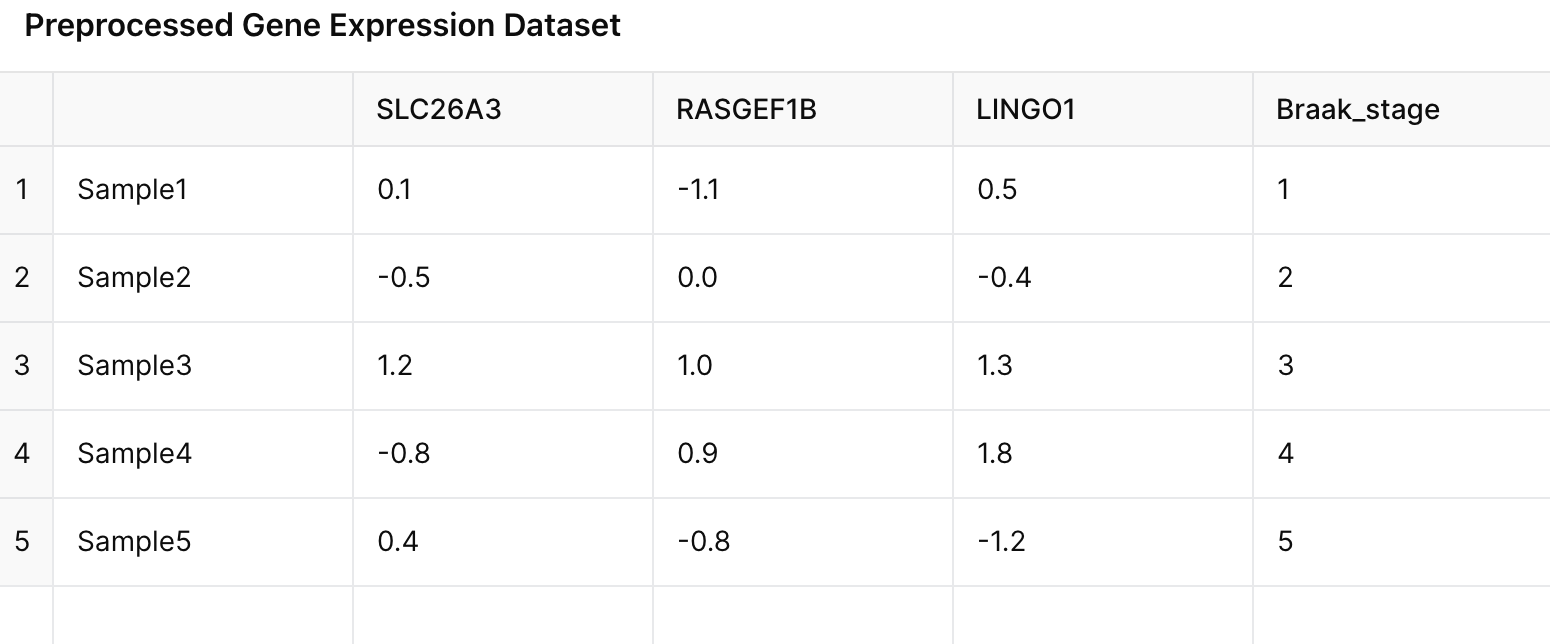

In [ ]:
# Step 1: Extract Gene Expression Data with Correct Indices
X = pd.DataFrame({
    gene: adata.raw[:, ensembl_id].X.toarray().flatten()
    for gene, ensembl_id in matched_genes.items()
}, index=adata.obs.index)  # Use adata.obs.index as the index

# Verify indices
print("Indices of X:", X.index[:10])
print("Indices of adata.obs:", adata.obs.index[:10])

# Step 2: Verify and Align Indices
common_indices = X.index.intersection(adata.obs.index)
if len(common_indices) == 0:
    raise ValueError("No common indices between X and adata.obs. Verify data alignment.")

X = X.loc[common_indices]  # Subset X to common indices
plot_data = pd.DataFrame({'Braak_stage': adata.obs['Braak']}).loc[common_indices]  # Subset plot_data to common indices

# Step 3: Map Braak Stages
stage_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
plot_data['Braak_stage'] = plot_data['Braak_stage'].astype(str).str.strip().str.upper().map(stage_mapping)

Indices of X: Index(['C0001_AAACGGGCAGTACACT-1', 'C0001_AAACGGGGTACCGTAT-1',
       'C0001_AAACGGGTCCAGAGGA-1', 'C0001_AAACGGGTCCTTCAAT-1',
       'C0001_AAAGATGGTCAACATC-1', 'C0001_AAAGATGGTGCTTCTC-1',
       'C0001_AAAGTAGAGACCTAGG-1', 'C0001_AAAGTAGGTATAGGTA-1',
       'C0001_AAATGCCGTCGGGTCT-1', 'C0001_AAATGCCGTGTCCTCT-1'],
      dtype='object')
Indices of adata.obs: Index(['C0001_AAACGGGCAGTACACT-1', 'C0001_AAACGGGGTACCGTAT-1',
       'C0001_AAACGGGTCCAGAGGA-1', 'C0001_AAACGGGTCCTTCAAT-1',
       'C0001_AAAGATGGTCAACATC-1', 'C0001_AAAGATGGTGCTTCTC-1',
       'C0001_AAAGTAGAGACCTAGG-1', 'C0001_AAAGTAGGTATAGGTA-1',
       'C0001_AAATGCCGTCGGGTCT-1', 'C0001_AAATGCCGTGTCCTCT-1'],
      dtype='object')


### 2.Data Preprocessing
Step 4: Handle Missing Values
Uses a technique called imputation to fill missing values in the gene expression data. Here, missing values are replaced with the column mean.

Step 5: Scale the Features
Standardizes the gene expression data to ensure all genes are on the same scale, improving the performance of machine learning algorithms.

In [ ]:
# Drop rows with missing target values
plot_data = plot_data.dropna(subset=['Braak_stage'])
X = X.loc[plot_data.index]  # Align X with updated plot_data

# Ensure non-empty data
if X.shape[0] == 0:
    raise ValueError("X is empty after alignment. Verify data and mapping steps.")
if plot_data.shape[0] == 0:
    raise ValueError("plot_data is empty after alignment. Verify data and mapping steps.")

# Step 4: Impute Missing Values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 5: Scale the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


### 3.Handle Class Imbalance

Step 6: Apply SMOTE (Synthetic Minority Oversampling Technique)
Handles imbalances in the Braak stage classes by generating synthetic samples for underrepresented classes.
This ensures that the model does not favor the majority class and performs well across all Braak stages.

In [ ]:
# Step 6: Define Target Variable
y = plot_data['Braak_stage']

# Apply SMOTE to Handle Class Imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


### 4.Split Data for Training and Testing
Step 7: Train/Test Split

Divides the data into two parts:

Training set (70%): Used to train the model.
Testing set (30%): Used to evaluate the model’s performance on unseen data.
Ensures the class distribution in the training and testing sets is stratified (balanced).


In [ ]:
 #Step 7: Split Data into Train/Test Sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

###5.Train the Model
Step 8: Train a Random Forest Model
Creates a Random Forest Classifier with 100 decision trees.
The model is trained on the training data (X_train and y_train).
The parameter class_weight='balanced' ensures the model accounts for class imbalances during training.

In [ ]:
# Step 8: Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

### 6.Evaluate the Model
Step 9: Model Evaluation
Classification Report: Provides metrics like precision, recall, and F1-score to assess the model's performance.
Confusion Matrix: Visualizes how well the model predicts each class compared to the true class.

In [ ]:
# Step 9: Evaluate Model
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         1.0       0.64      0.89      0.75      3520
         2.0       0.63      0.34      0.44      3520
         6.0       0.53      0.56      0.55      3520

    accuracy                           0.60     10560
   macro avg       0.60      0.60      0.58     10560
weighted avg       0.60      0.60      0.58     10560



### 7.Analyze Feature Importance
Step 10: Feature Importance
Random Forests can identify which genes (features) are most important for predicting Braak stages.
A bar plot ranks the genes based on their importance score, helping identify key biomarkers.


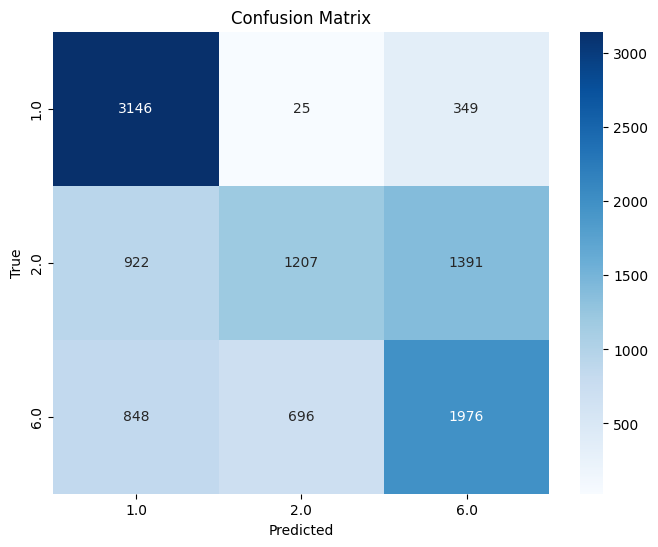

<ipython-input-12-8b8360c0edab>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Gene', palette='viridis')


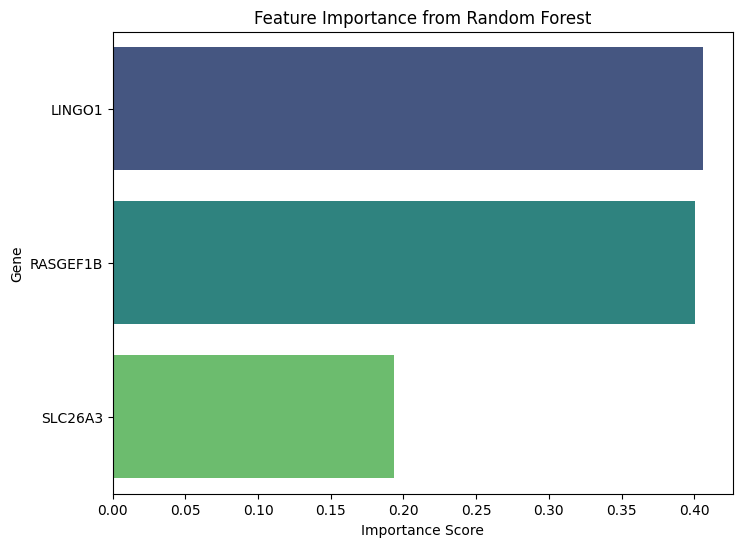

In [ ]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Gene': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Gene', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Gene')
plt.show()


Results Interpretation

**1. Feature Importance Plot**
Observation:
LINGO1 is the most important gene for predicting Braak stages, followed by RASGEF1B and then SLC26A3.

Significance:
This suggests that LINGO1 may have the strongest association with disease
progression.
The ranking provides valuable biological insights, as researchers may prioritize studying LINGO1 in relation to Braak stages.

**2. Confusion Matrix**
What It Shows:
The confusion matrix compares the true Braak stages (rows) with the predicted ones (columns):
Diagonal cells (e.g., 3146): Correct predictions.
Off-diagonal cells (e.g., 922, 696): Misclassifications.

Key Observations:
Class 1.0: Most predictions are correct (3146), showing high accuracy for this class.
Class 2.0 and 6.0:
- More misclassifications (e.g., 922 instances of 2.0 misclassified as 1.0).
- Indicates that 2.0 and 6.0 stages might have overlapping patterns in gene
expression, making them harder to distinguish.

Improvement Areas:
Misclassifications between 2.0 and 6.0 suggest additional genes or features
might help improve accuracy.

## 6.1.2. Key Insights from Results

Average Accuracy:
The overall accuracy of 60% indicates a moderately performing model.

1. LINGO1 Dominates:
○ The feature importance highlights LINGO1 as the strongest predictor. This aligns
with the biological hypothesis that it may play a key role in Braak stage
progression.
2. Challenges with 2.0 and 6.0:
○ Misclassifications in the confusion matrix and lower recall suggest overlapping
expression patterns or insufficient predictive power of the selected genes for
these stages.
3. Model Performance:
○ While 60% accuracy is promising, adding more genes or tuning the model (e.g.,hyperparameters, feature engineering) could improve performance

## 6.2 Random Forest on different datasets

---




###6.2.1 Molecular Signatures of Resilience to Alzheimer’s Disease in Neocortical Layer 4 Neurons - Inhibitory

In [ ]:
import urllib.request
import scanpy

# Molecular Signatures of Resilience to Alzheimer’s Disease in Neocortical Layer 4 Neurons Inhibitory
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/87158a0a-629f-47b4-9eec-2212686e1927.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')

Matched Genes (gene name: ID name):
SLC26A3: ENSG00000091138
RASGEF1B: ENSG00000138670
LINGO1: ENSG00000169783

Unmatched Genes:


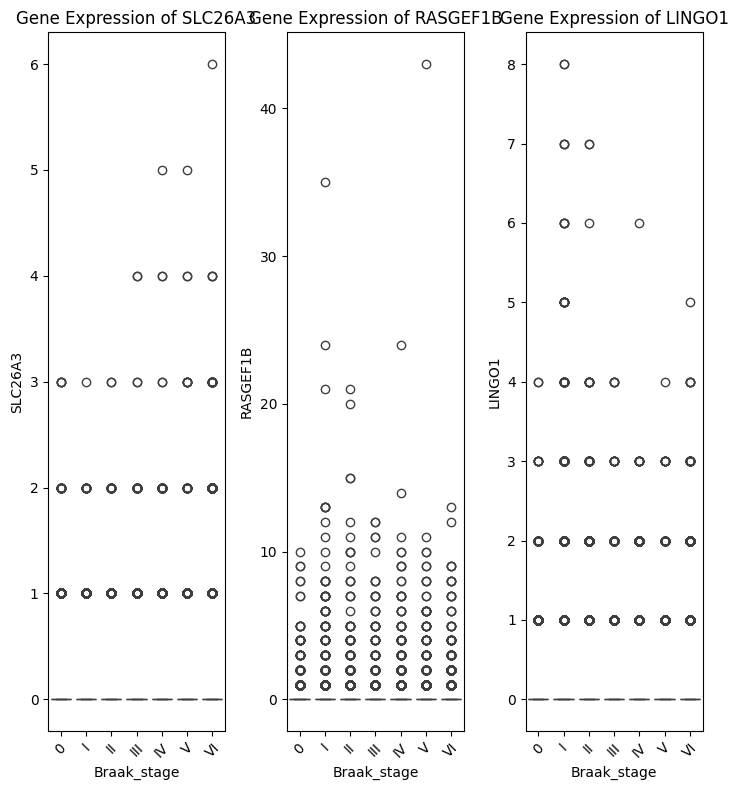

In [ ]:
# Braak Stage Vs Gene Expression for genes of interest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Define the specific genes of interest
genes_of_interest = [
    "SLC26A3",
    "RASGEF1B",
    "LINGO1"
]

# Step 2: Create a mapping of feature names to Ensembl IDs using the index
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']  # This contains the gene name
    ensembl_id = index  # Use the index as the Ensembl ID
    gene_mapping[gene_name] = ensembl_id

# Step 3: Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Print matched and unmatched genes
print("Matched Genes (gene name: ID name):")
for gene, ensembl_id in matched_genes.items():
    print(f"{gene}: {ensembl_id}")

print("\nUnmatched Genes:")
for gene in unmatched_genes:
    print(gene)

# Step 4: Extract gene expression for the matched genes and Braak stages
expression_data = {}
for gene in matched_genes.keys():
    # Get the Ensembl ID for the gene
    ensembl_id = matched_genes[gene]

    # Fetch gene expression data (from raw or X depending on your setup)
    # Convert the sparse matrix to a dense numpy array and flatten it
    expression_data[gene] = adata.raw[:, ensembl_id].X.toarray().flatten()  # Convert to array and flatten

# Step 5: Get Braak stage information from `adata.obs['Braak']`
braak_stages = adata.obs['Braak.stage']

# Step 6: Prepare data for plotting
# Convert expression data into a DataFrame for plotting
plot_data = pd.DataFrame({
    'Braak_stage': braak_stages,
    **{gene: expression_data[gene] for gene in matched_genes.keys()}  # No need to flatten here as it's already done
})

# Step 7: Visualize gene expression across Braak stages using a boxplot
plt.figure(figsize=(12, 8))
for idx, gene in enumerate(matched_genes.keys(), start=1):
    plt.subplot(1, 5, idx)
    sns.boxplot(data=plot_data, x='Braak_stage', y=gene)
    plt.title(f'Gene Expression of {gene}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


Indices of X: Index(['AAACCTGAGTTCGCAT-C0017', 'AAACCTGGTAGGGTAC-C0017',
       'AAACCTGGTCCTAGCG-C0017', 'AAACGGGGTACGCACC-C0017',
       'AAAGATGAGAGCTATA-C0017', 'AAAGATGCACTATCTT-C0017',
       'AAAGCAAGTGCATCTA-C0017', 'AAAGCAATCTTTAGTC-C0017',
       'AAAGTAGCAACACCTA-C0017', 'AAAGTAGTCAGCTCTC-C0017'],
      dtype='object')
Indices of adata.obs: Index(['AAACCTGAGTTCGCAT-C0017', 'AAACCTGGTAGGGTAC-C0017',
       'AAACCTGGTCCTAGCG-C0017', 'AAACGGGGTACGCACC-C0017',
       'AAAGATGAGAGCTATA-C0017', 'AAAGATGCACTATCTT-C0017',
       'AAAGCAAGTGCATCTA-C0017', 'AAAGCAATCTTTAGTC-C0017',
       'AAAGTAGCAACACCTA-C0017', 'AAAGTAGTCAGCTCTC-C0017'],
      dtype='object')
Classification Report:
              precision    recall  f1-score   support

         1.0       0.29      0.22      0.25      6209
         2.0       0.00      0.00      0.00      6210
         3.0       0.35      0.00      0.00      6210
         4.0       0.17      0.86      0.29      6210
         5.0       0.25      0.02 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


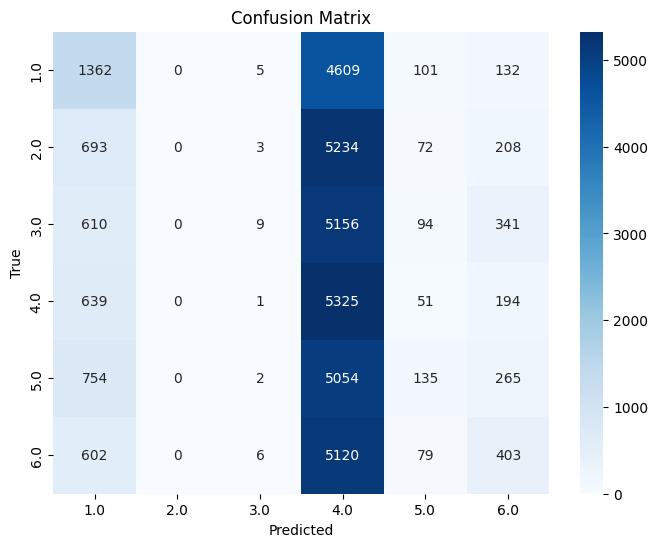

<ipython-input-4-11758c4c0656>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Gene', palette='viridis')


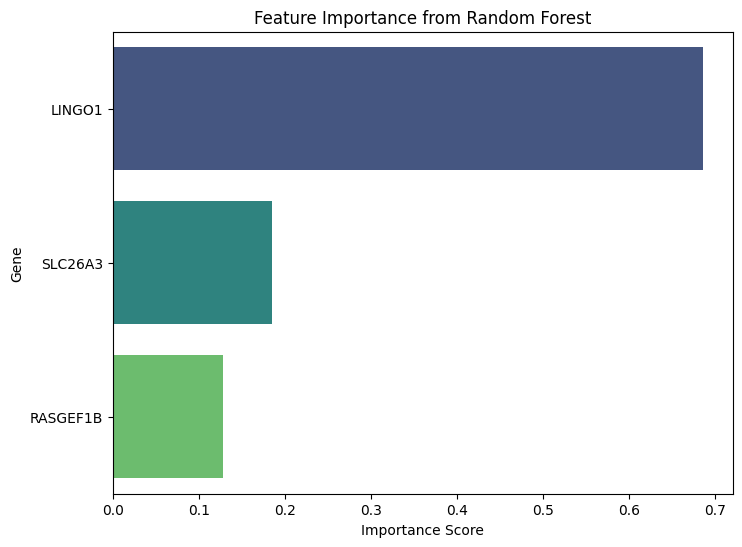

In [ ]:
# Step 1: Extract Gene Expression Data with Correct Indices
X = pd.DataFrame({
    gene: adata.raw[:, ensembl_id].X.toarray().flatten()
    for gene, ensembl_id in matched_genes.items()
}, index=adata.obs.index)  # Use adata.obs.index as the index

# Verify indices
print("Indices of X:", X.index[:10])
print("Indices of adata.obs:", adata.obs.index[:10])

# Step 2: Verify and Align Indices
common_indices = X.index.intersection(adata.obs.index)
if len(common_indices) == 0:
    raise ValueError("No common indices between X and adata.obs. Verify data alignment.")

X = X.loc[common_indices]  # Subset X to common indices
plot_data = pd.DataFrame({'Braak_stage': adata.obs['Braak.stage']}).loc[common_indices]  # Subset plot_data to common indices

# Step 3: Map Braak Stages
stage_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
plot_data['Braak_stage'] = plot_data['Braak_stage'].astype(str).str.strip().str.upper().map(stage_mapping)

# Drop rows with missing target values
plot_data = plot_data.dropna(subset=['Braak_stage'])
X = X.loc[plot_data.index]  # Align X with updated plot_data

# Ensure non-empty data
if X.shape[0] == 0:
    raise ValueError("X is empty after alignment. Verify data and mapping steps.")
if plot_data.shape[0] == 0:
    raise ValueError("plot_data is empty after alignment. Verify data and mapping steps.")

# Step 4: Impute Missing Values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 5: Scale the Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 6: Define Target Variable
y = plot_data['Braak_stage']

# Apply SMOTE to Handle Class Imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 7: Split Data into Train/Test Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Step 8: Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 9: Evaluate Model
y_pred = rf_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Gene': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Importance', y='Gene', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Gene')
plt.show()


#### Key Insights from Results

Average Accuracy:
The overall accuracy of 19% indicates a poorly performing model.

1. LINGO1 Dominates:
The feature importance highlights LINGO1 as the strongest predictor. This aligns
with the biological hypothesis that it may play a key role in Braak stage
progression.
2. Challenges with Classification:
The matrix indicates that most of the predictions are concentrated around class 4, suggesting that the model is over-predicting this class at the expense of others. There are noticeable misclassifications for all classes, especially classes 1 and 6, which are frequently predicted as class 4.

###6.2.2 Microglia-PVM - DLPFC: Seattle Alzheimer's Disease Atlas (SEA-AD) - 3 Genes of Interest

In [ ]:
!pip install scanpy seaborn anndata

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.5 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=8d900254626f646d1a7d54ca329ef5c7737498c7c650833ca71f9da9af708148
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [ ]:
#Reading the dataset
import urllib.request
import scanpy

# Microglia-PVM - DLPFC: Seattle Alzheimer's Disease Atlas (SEA-AD)
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/6ea7ef32-8a23-40d2-8870-811df2fb2d53.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
adata

AnnData object with n_obs × n_vars = 42486 × 36412
    obs: 'assay_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'Neurotypical reference', 'Class', 'Subclass', 'Supertype', 'Age at death', 'Years of education', 'Cognitive status', 'ADNC', 'Braak stage', 'Thal phase', 'CERAD score', 'APOE4 status', 'Lewy body disease pathology', 'LATE-NC stage', 'Microinfarct pathology', 'Specimen ID', 'PMI', 'Number of UMIs', 'Genes detected', 'Fraction mitochrondrial UMIs', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'ADNC_colors', 'AP

Keeping it consistent with above models, we have first run the model on only the 3 genes of concern

In [ ]:
# Specify the genes of interest
# Matched Genes (gene name: ID name):
# SLC26A3: ENSG00000091138
# RASGEF1B: ENSG00000138670
# LINGO1: ENSG00000169783
genes_of_interest = ["ENSG00000091138","ENSG00000138670","ENSG00000169783"]

# Subset the AnnData object to keep only these genes
adata = adata[:, genes_of_interest]


In [ ]:
# Running random forest on adata which tries to predict adata.obs['Braak stage']

import scanpy as sc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Prepare the data
X = adata.X
y = adata.obs['Braak stage'] #dependent variable

# Convert y to numeric if it's not already
if not pd.api.types.is_numeric_dtype(y):
    y = pd.Categorical(y).codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust parameters
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[   0,    1,    0,    0,    5,  255,    1],
       [   0,    0,    4,    0,   13,  189,    4],
       [   0,    3,    8,   12,   23,  355,   19],
       [   1,    0,    9,    7,   21,  429,   38],
       [   6,    9,   24,   36,  131, 1770,  118],
       [   8,   18,   49,   54,  233, 2893,  194],
       [   3,   10,   22,   32,   99, 1274,  118]])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy and classification report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.371499176276771
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.00      0.00      0.00       210
           2       0.07      0.02      0.03       420
           3       0.05      0.01      0.02       505
           4       0.25      0.06      0.10      2094
           5       0.40      0.84      0.55      3449
           6       0.24      0.08      0.12      1558

    accuracy                           0.37      8498
   macro avg       0.14      0.14      0.12      8498
weighted avg       0.28      0.37      0.27      8498



Accuracy score - 37%

#### Optimization of model with hyperparameters
Now, we have tried to optimize the model by iterating on different values of hyperparameters

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import urllib.request

# Optimize hyperparameters using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum samples required to be at a leaf node
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) # Use all cores

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Train the model with the best hyperparameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.4029657702940176
Confusion Matrix:
 [[   0    0    0    0    0  262    0]
 [   0    0    0    0    4  205    1]
 [   0    0    0    0    1  417    2]
 [   0    0    0    0    2  497    6]
 [   0    0    0    0   18 2066   10]
 [   0    0    0    0   24 3416    9]
 [   0    0    0    1   12 1535   10]]
Accuracy: 0.4052718286655684
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.00      0.00      0.00       210
           2       0.00      0.00      0.00       420
           3       0.00      0.00      0.00       505
           4       0.30      0.01      0.02      2094
           5       0.41      0.99      0.58      3449
           6       0.26      0.01      0.01      1558

    accuracy                           0.41      8498
   macro avg       0.14      0.14 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Improved accuracy score - 41%

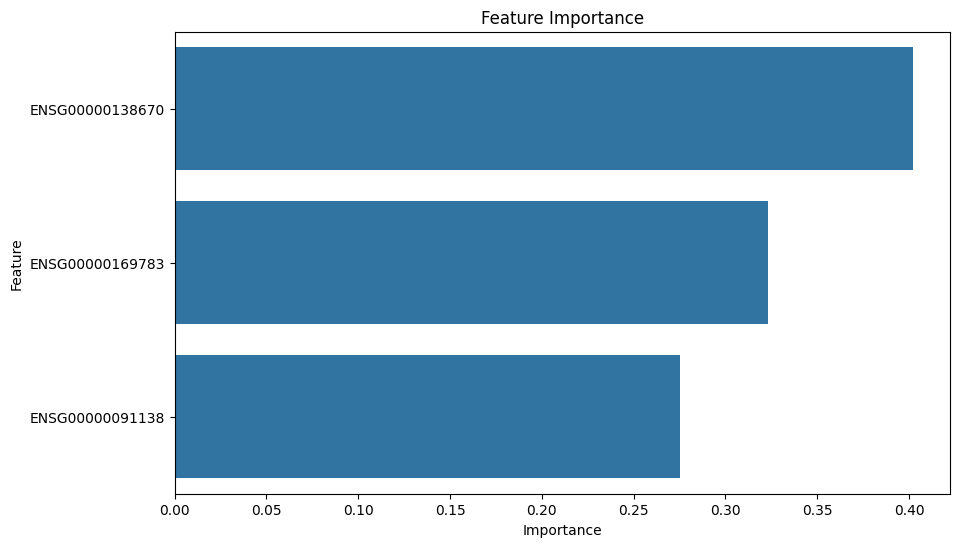

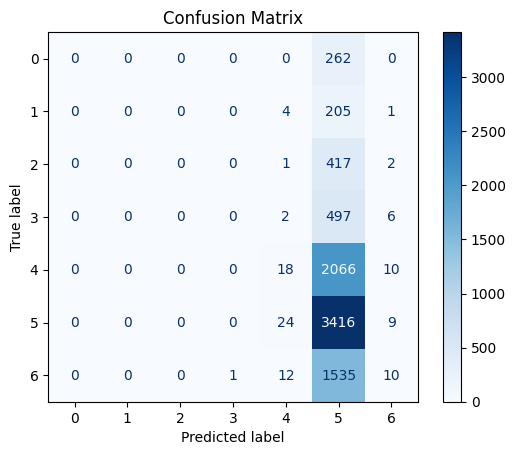

In [ ]:
# printing feature importance and confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Feature Importance
feature_importances = best_rf_classifier.feature_importances_

# Assuming 'genes_of_interest' contains the feature names
feature_names = genes_of_interest  # Replace with your actual feature names

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test)) # Use unique labels from y_test
disp.plot(cmap=plt.cm.Blues)  # Use a colormap
plt.title("Confusion Matrix")
plt.show()

# SLC26A3: ENSG00000091138 - Least Important
# RASGEF1B: ENSG00000138670 - Most Important
# LINGO1: ENSG00000169783

#### Key Insights from Results

Average Accuracy:
The overall accuracy of 41% still indicates a poorly performing model.

1. RASGEF1B Dominates:
The feature importance highlights RASGEF1B as the strongest predictor. This does not align
with the previous model findings which labelled LINGO1 as the most dominant gene factor.
2. Challenges with Classification:
The matrix indicates that most of the predictions are concentrated around class 5, suggesting that the model is over-predicting this class at the expense of others. There are noticeable misclassifications for all classes, which are frequently predicted as class 5.

###6.2.3 Microglia-PVM - DLPFC: Seattle Alzheimer's Disease Atlas (SEA-AD) - All **Genes**

In [ ]:
import urllib.request
import scanpy

# Microglia-PVM - DLPFC: Seattle Alzheimer's Disease Atlas (SEA-AD)
urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/6ea7ef32-8a23-40d2-8870-811df2fb2d53.h5ad', 'dataset.h5ad')

adata = scanpy.read_h5ad('dataset.h5ad')
adata


AnnData object with n_obs × n_vars = 42486 × 36412
    obs: 'assay_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'donor_id', 'Neurotypical reference', 'Class', 'Subclass', 'Supertype', 'Age at death', 'Years of education', 'Cognitive status', 'ADNC', 'Braak stage', 'Thal phase', 'CERAD score', 'APOE4 status', 'Lewy body disease pathology', 'LATE-NC stage', 'Microinfarct pathology', 'Specimen ID', 'PMI', 'Number of UMIs', 'Genes detected', 'Fraction mitochrondrial UMIs', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'ADNC_colors', 'AP

In [ ]:
import scanpy as sc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

# Prepare the data
# Step 1: Extract Gene Expression Data with Correct Indices
X = pd.DataFrame({
    gene: adata.raw[:, ensembl_id].X.toarray().flatten()
    for gene, ensembl_id in matched_genes.items()
}, index=adata.obs.index)  # Use adata.obs.index as the index

# Verify indices
print("Indices of X:", X.index[:10])
print("Indices of adata.obs:", adata.obs.index[:10])

# Step 2: Verify and Align Indices
common_indices = X.index.intersection(adata.obs.index)
if len(common_indices) == 0:
    raise ValueError("No common indices between X and adata.obs. Verify data alignment.")

X = X.loc[common_indices]  # Subset X to common indices
plot_data = pd.DataFrame({'Braak_stage': adata.obs['Braak stage']}).loc[common_indices]  # Subset plot_data to common indices

y = adata.obs['Braak stage']

# Convert y to numeric if it's not already
if not pd.api.types.is_numeric_dtype(y):
    y = pd.Categorical(y).codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust parameters
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Create and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[  87,    0,    0,    0,   54,  121,    0],
       [   0,    6,    0,    0,   33,  165,    6],
       [   0,    0,    0,    0,   57,  361,    2],
       [   0,    0,    0,    0,   45,  457,    3],
       [   0,    0,    0,    0,  574, 1513,    7],
       [   0,    0,    0,    0,  241, 3191,   17],
       [   0,    0,    0,    0,   88, 1347,  123]])

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.46846316780418923
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50       262
           1       1.00      0.03      0.06       210
           2       0.00      0.00      0.00       420
           3       0.00      0.00      0.00       505
           4       0.53      0.27      0.36      2094
           5       0.45      0.93      0.60      3449
           6       0.78      0.08      0.14      1558

    accuracy                           0.47      8498
   macro avg       0.54      0.23      0.24      8498
weighted avg       0.51      0.47      0.38      8498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']  # This contains the gene name
    ensembl_id = index  # Use the index as the Ensembl ID
    gene_mapping[gene_name] = ensembl_id

# Step 3: Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for index, row in adata.var.iterrows():
    gene = row['feature_name']
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

print(matched_genes)

{'TSPAN6': 'ENSG00000000003', 'TNMD': 'ENSG00000000005', 'DPM1': 'ENSG00000000419', 'SCYL3': 'ENSG00000000457', 'C1orf112': 'ENSG00000000460', 'FGR': 'ENSG00000000938', 'CFH': 'ENSG00000000971', 'FUCA2': 'ENSG00000001036', 'GCLC': 'ENSG00000001084', 'NFYA': 'ENSG00000001167', 'STPG1': 'ENSG00000001460', 'NIPAL3': 'ENSG00000001461', 'LAS1L': 'ENSG00000001497', 'ENPP4': 'ENSG00000001561', 'SEMA3F': 'ENSG00000001617', 'CFTR': 'ENSG00000001626', 'ANKIB1': 'ENSG00000001629', 'CYP51A1': 'ENSG00000001630', 'KRIT1': 'ENSG00000001631', 'RAD52': 'ENSG00000002016', 'BAD': 'ENSG00000002330', 'LAP3': 'ENSG00000002549', 'CD99_ENSG00000002586': 'ENSG00000002586', 'HS3ST1': 'ENSG00000002587', 'AOC1': 'ENSG00000002726', 'WNT16': 'ENSG00000002745', 'HECW1': 'ENSG00000002746', 'MAD1L1': 'ENSG00000002822', 'LASP1': 'ENSG00000002834', 'SNX11': 'ENSG00000002919', 'TMEM176A': 'ENSG00000002933', 'M6PR': 'ENSG00000003056', 'KLHL13': 'ENSG00000003096', 'CYP26B1': 'ENSG00000003137', 'ICA1': 'ENSG00000003147', 'D

<ipython-input-16-0f6168d9d6aa>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_features['Gene Name'] = top_10_gene_names


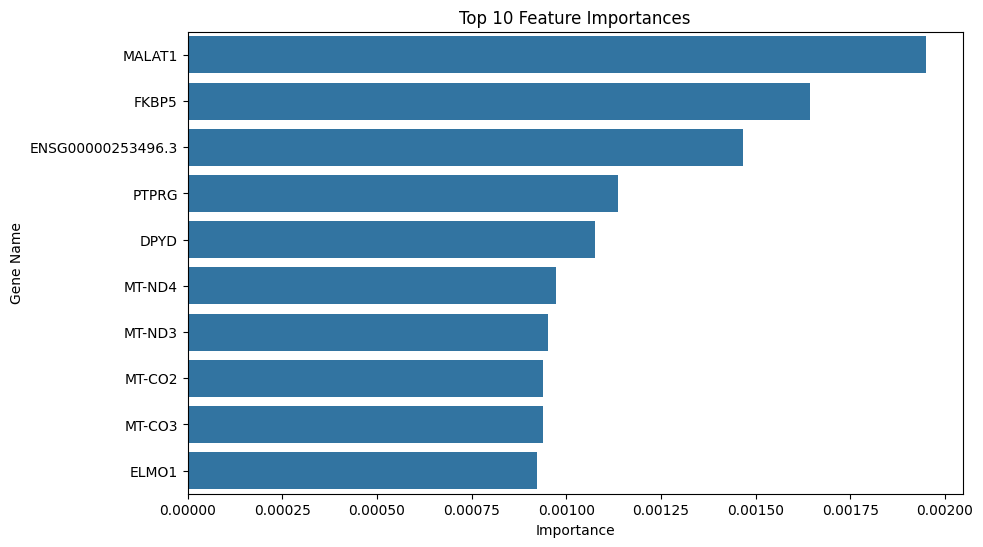

In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': adata.var_names, 'Importance': feature_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 10 features
top_10_features = feature_importance_df.head(10)

# Map feature names (ensembl ids) to gene names
top_10_gene_names = []
for ensembl_id in top_10_features['Feature']:
    for gene_name, gene_id in matched_genes.items():
        if gene_id == ensembl_id:
            top_10_gene_names.append(gene_name)
            break
    else:
        top_10_gene_names.append(ensembl_id)  # Use ensembl id if no match found

top_10_features['Gene Name'] = top_10_gene_names

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Gene Name', data=top_10_features)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Gene Name')
plt.show()

#### Key Insights from Results

Average Accuracy:
The accuracy of 47% still indicates a poorly performing model, however it is a significant improvement from the above run with only the 3 genes.

The feature importance graph shows that other genes are more significant than our chosen genes in making predictions.

###6.2.4 Concatenation of two datasets

Since the previous dataset had some BRAAK stages underrepresented, we normalized and combined 2 datasets.
1. Single-soma transcriptomics of tangle-bearing neurons in Alzheimer’s isease - Inhibitory
2. Molecular Signatures of Resilience to Alzheimer’s Disease in Neocortical Layer 4 Neurons - Inhibitory


Why did we choose the two datasets?

1. Both the data sets have data from the prefrontal cortex tissues of the brain.
2. Both datasets contain data for  Alzheimer's disease from patients whose BRAAK stage ranges from 1 to 6.
3. The datasets also contain Genes we are interested in exploring as specified in our problem statement

Link to Code - https://ml.azure.com/fileexplorerAzNB?wsid=/subscriptions/cd205f97-ea8f-4761-9bbb-81f7f6edafb7/resourcegroups/SEM/providers/Microsoft.MachineLearningServices/workspaces/Alzheimers&tid=e36ee38f-91b8-4dca-9b13-caa5360c9714&notebookPivot=0&activeFilePath=Users/debanged/CellxGene.ipynb
(We have run this part of the code on Azure)



####Key Insights from Results
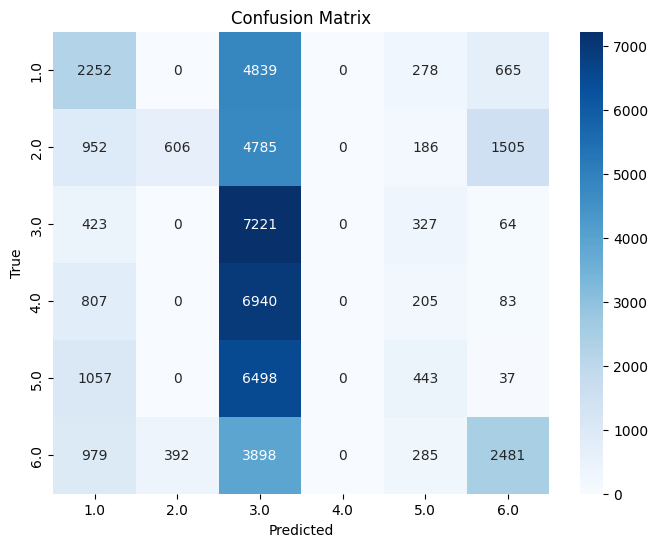

1. Diagonal Values (True Positives):
These represent correctly classified instances for each Braak stage.
For example:
Stage 3 has the highest number of correct predictions (7,221).
Stage 1 has 2,252 correct predictions.

2. Off-Diagonal Values (Misclassifications):
Misclassifications are concentrated in adjacent Braak stages (e.g., Stage 1 is commonly confused with Stage 3).
This suggests that the model struggles to distinguish between neighboring stages due to overlapping patterns in the features.

3. Key Observations:
The model predicts Stage 3 very frequently, even for other stages, which might indicate bias or class imbalance in the data.
Stages 5 and 6 have fewer true positives, possibly due to fewer samples or less distinct features.

###Challenges in concatenating two Anndata
The 'var' part of two anndata cannot be truly merged.
The below excerpt shows the behaviour of how the 'var' part of the concatenated anndata looks like:

Singular anndata - var: 'feature_name', 'feature_length', 'feature_type'

Concatenated anndata - var: 'feature_name-0', 'feature_length-0', 'feature_type-0', 'feature_name-1', 'feature_length-1', 'feature_type-1'


#7. XGBoost

XGBoost (eXtreme Gradient Boosting) is a powerful, scalable machine learning library based on gradient boosting. It builds an ensemble of decision trees in a sequential manner, where each tree corrects the errors of the previous ones, optimizing for performance and efficiency. Known for its speed, accuracy, and ability to handle missing data, XGBoost is widely used in data science competitions and real-world applications. Its features include regularization to reduce overfitting, parallel processing, and support for large datasets.

Why we chose XGBoost:
1. High Performance and Efficiency: Optimized for speed with parallel and distributed computing, making it suitable for large datasets.
2. Accuracy: Employs gradient boosting with regularization to reduce overfitting and improve prediction quality.
3. Handles Missing Data: Automatically learns optimal splits for missing values, making preprocessing easier.
4. Feature Importance: Provides insights into feature contributions, aiding model interpretability.

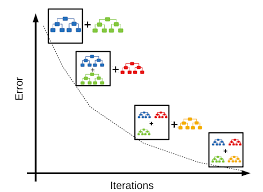

Confusion Matrix:
[[   0    0    0    0    2  260    0]
 [   0    0    0    0    6  201    3]
 [   0    0    0    1    3  409    7]
 [   0    0    1    0    9  487    8]
 [   0    0    2    2   50 2008   32]
 [   0    1    5    2   84 3299   58]
 [   0    0    1    4   31 1487   35]]


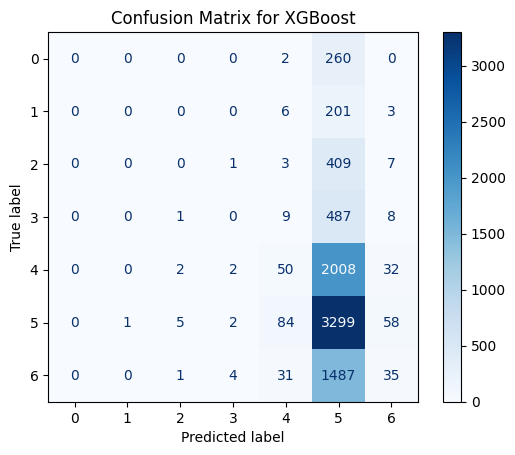

In [ ]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import urllib.request
import scanpy as sc

X = adata.X
y = adata.obs['Braak stage']

# Convert y to numeric if necessary
if not pd.api.types.is_numeric_dtype(y):
    y = pd.Categorical(y).codes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42)
xgb_classifier.fit(X_train, y_train)


# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.39821134384561074
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       262
           1       0.00      0.00      0.00       210
           2       0.00      0.00      0.00       420
           3       0.00      0.00      0.00       505
           4       0.27      0.02      0.04      2094
           5       0.40      0.96      0.57      3449
           6       0.24      0.02      0.04      1558

    accuracy                           0.40      8498
   macro avg       0.13      0.14      0.09      8498
weighted avg       0.28      0.40      0.25      8498



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy Score: 40%

##Optimization of models with hyperparameters
P.S. Compute power was not enough for this to run, kept timing out

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import xgboost as xgb
import matplotlib.pyplot as plt
import urllib.request
import scanpy as sc

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.5],
    'min_child_weight': [1, 3, 5]
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), random_state=42, eval_metric='mlogloss')


# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_xgb_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the model
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for XGBoost")
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
feature_importances = best_xgb_classifier.feature_importances_
feature_names = genes_of_interest  # Use the correct feature names

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


KeyboardInterrupt: 

# Key Conclusions and Insights Overall
The LINGO1 and RASGES1B  genes showed significant contributions to the model's predictions.

Due to data limitations, the model's overall predictive accuracy was low.

Drawing definitive conclusions about the upregulation of these genes across progressive Braak stages, and their contribution to Alzheimer's disease (AD) remains challenging.



# Key Innovations from our Project
Why Are Our Findings Innovative?

● Explored  less-studied genes like RASGEF1B, SLC26A3, and LINGO1, going beyond the well-known AD genes like MAPT.

● Mapping their activity across Braak stages, uncovering how their roles evolve as the disease progresses.

● Our ML Models  assured the gene expression progression with LINGO in later Braak stages

 Studies also shows LINGO , responsible for Axon regeneration inhibitor and a significant contributor
 of CNS related Disorders like Parkinsons,  Multiple sclerosis , etc
Gene SLC26A3 -    ion balance in tissues, particularly in the gastrointestinal tract, offering further studies on this relation with AD.



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 4.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=8e9db28554f6c0574786eaf3587a0cf0880ef41cdc6a6bfd360ff5ee06f93540
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
Unique Braak stages: ['II', 'VI', 'III', '0', 'IV', 'V', 'I']
Categories (7, object): ['0', 'I', 'II', 'III', 'IV', 'V', 'VI']
Linear Regression Results:
SLC26A3: Coefficient = 0.42040514945

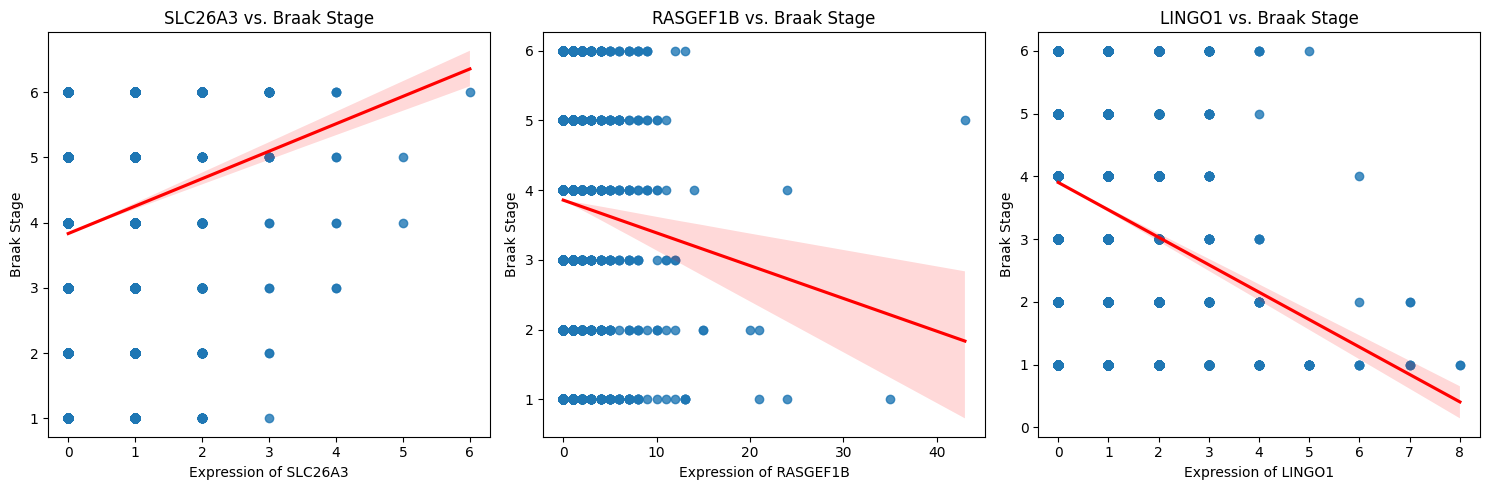

In [ ]:
!pip install scanpy
import urllib
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


# url = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
# urllib.request.urlretrieve(url, 'dataset.h5ad')

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/87158a0a-629f-47b4-9eec-2212686e1927.h5ad', 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

genes_of_interest = ["SLC26A3", "RASGEF1B", "LINGO1"]


gene_mapping = {row['feature_name']: index for index, row in adata.var.iterrows()}
matched_genes = {gene: gene_mapping[gene] for gene in genes_of_interest if gene in gene_mapping}

print("Unique Braak stages:", adata.obs['Braak.stage'].unique())


braak_mapping = {'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6}
adata.obs['Braak_stage_num'] = adata.obs['Braak.stage'].map(braak_mapping)

#Extract gene expression data for the matched genes and Braak stages
expression_data = {}
for gene, ensembl_id in matched_genes.items():
    expression_data[gene] = adata.raw[:, ensembl_id].X.toarray().flatten()

# Prepare a DataFrame for the regression analysis
df = pd.DataFrame({
    'Braak_stage': adata.obs['Braak_stage_num'].astype(float),
    **{gene: expression_data[gene] for gene in matched_genes.keys()}
}).dropna()

#Perform Linear Regression for each gene
results = {}
for gene in matched_genes.keys():
    X = df[[gene]]
    y = df['Braak_stage']

    model = LinearRegression()
    model.fit(X, y)


    results[gene] = {
        'coefficient': model.coef_[0],
        'intercept': model.intercept_,
        'r_squared': model.score(X, y)
    }


print("Linear Regression Results:")
for gene, result in results.items():
    print(f"{gene}: Coefficient = {result['coefficient']}, Intercept = {result['intercept']}, R^2 = {result['r_squared']}")

#Plot the results
plt.figure(figsize=(15, 5))
for idx, gene in enumerate(matched_genes.keys(), start=1):
    plt.subplot(1, 3, idx)
    sns.regplot(x=gene, y='Braak_stage', data=df, line_kws={"color": "red"})
    plt.title(f'{gene} vs. Braak Stage')
    plt.xlabel(f'Expression of {gene}')
    plt.ylabel('Braak Stage')

plt.tight_layout()
plt.show()

In [ ]:
import urllib.request
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Define genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP", "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609", "PHYHIP", "RP11-745L13.2"]

# Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']
    ensembl_id = index
    gene_mapping[gene_name] = ensembl_id

# Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Filter adata to include only matched Ensembl IDs
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Dictionary to store p-values by sex group
p_values_by_sex = {}

# Analyze differential expression between male and female subjects
for sex in ['male', 'female']:
    adata_sex_group = adata_filtered[adata_filtered.obs['sex'] == sex]

    # Filter data for Alzheimer's and normal subjects in this sex group
    alz_data = adata_sex_group[adata_sex_group.obs['disease'] == 'Alzheimer disease']
    normal_data = adata_sex_group[adata_sex_group.obs['disease'] == 'normal']

    # Perform differential expression analysis for each gene
    p_values = {}
    for gene_name, gene_id in matched_genes.items():
        alz_expression = alz_data[:, gene_id].X.toarray().flatten()
        normal_expression = normal_data[:, gene_id].X.toarray().flatten()

        # Conduct a t-test
        t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
        p_values[gene_name] = p_val

    # Store p-values for this sex group
    p_values_by_sex[sex] = p_values

# Calculate total subplots needed based on significant genes
total_plots = sum(len([gene for gene, p_val in p_values.items() if p_val < 0.05]) for p_values in p_values_by_sex.values())
fig, axes = plt.subplots((total_plots + 2) // 3, 3, figsize=(18, ((total_plots + 2) // 3) * 5))
axes = axes.flatten()

plot_idx = 0
for sex, p_values in p_values_by_sex.items():
    significant_genes = [gene for gene, p_val in p_values.items() if p_val < 0.05]

    for gene_name in significant_genes:
        if plot_idx >= len(axes):
            break  # Avoid index out of bounds

        gene_id = matched_genes[gene_name]

        sns.violinplot(
            x=adata_filtered.obs['disease'],
            y=adata_filtered[:, gene_id].X.toarray().flatten(),
            hue=adata_filtered.obs['disease'],  # Set 'disease' as hue
            data=adata_filtered.obs,
            palette={"Alzheimer disease": "purple", "normal": "green"},
            ax=axes[plot_idx],
            legend=False  # Disable legend for each individual plot
        )

        axes[plot_idx].set_title(f'Expression of {gene_name} ({sex})')
        axes[plot_idx].set_ylabel('Expression Level')
        axes[plot_idx].set_xlabel('Disease Condition')

        plot_idx += 1

# Remove unused axes
for ax in axes[plot_idx:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'scanpy'

In [ ]:
!pip install scanpy
import urllib.request
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load the dataset
url_data = 'https://datasets.cellxgene.cziscience.com/6ea7ef32-8a23-40d2-8870-811df2fb2d53.h5ad'
urllib.request.urlretrieve(url_data, 'dataset.h5ad')
adata = sc.read_h5ad('dataset.h5ad')

# Define genes of interest
genes_of_interest = ["SLC26A3", "RASGEF1B", "RP11-701H24.9", "LINGO1", "PDE4DIP", "AC159540.1", "RP11-289H16.1", "RP11-219A15.1", "LINC01609", "PHYHIP", "RP11-745L13.2"]

# Create a mapping of feature names to Ensembl IDs
gene_mapping = {}
for index, row in adata.var.iterrows():
    gene_name = row['feature_name']
    ensembl_id = index
    gene_mapping[gene_name] = ensembl_id

# Find matched and unmatched genes
matched_genes = {}
unmatched_genes = []

for gene in genes_of_interest:
    if gene in gene_mapping:
        matched_genes[gene] = gene_mapping[gene]
    else:
        unmatched_genes.append(gene)

# Filter adata to include only matched Ensembl IDs
matched_ids = list(matched_genes.values())
adata_filtered = adata[:, adata.var_names.isin(matched_ids)]

# Dictionary to store p-values by sex group
p_values_by_sex = {}

# Analyze differential expression between male and female subjects
for sex in ['male', 'female']:
    adata_sex_group = adata_filtered[adata_filtered.obs['sex'] == sex]

    # Filter data for Alzheimer's and normal subjects in this sex group
    alz_data = adata_sex_group[adata_sex_group.obs['disease'] == 'Alzheimer disease']
    normal_data = adata_sex_group[adata_sex_group.obs['disease'] == 'normal']

    # Perform differential expression analysis for each gene
    p_values = {}
    for gene_name, gene_id in matched_genes.items():
        alz_expression = alz_data[:, gene_id].X.toarray().flatten()
        normal_expression = normal_data[:, gene_id].X.toarray().flatten()

        # Conduct a t-test
        t_stat, p_val = ttest_ind(alz_expression, normal_expression, equal_var=False)
        p_values[gene_name] = p_val

    # Store p-values for this sex group
    p_values_by_sex[sex] = p_values

# Calculate total subplots needed based on significant genes
total_plots = sum(len([gene for gene, p_val in p_values.items() if p_val < 0.05]) for p_values in p_values_by_sex.values())
fig, axes = plt.subplots((total_plots + 2) // 3, 3, figsize=(18, ((total_plots + 2) // 3) * 5))
axes = axes.flatten()

plot_idx = 0
for sex, p_values in p_values_by_sex.items():
    significant_genes = [gene for gene, p_val in p_values.items() if p_val < 0.05]

    for gene_name in significant_genes:
        if plot_idx >= len(axes):
            break  # Avoid index out of bounds

        gene_id = matched_genes[gene_name]

        sns.violinplot(
            x=adata_filtered.obs['disease'],
            y=adata_filtered[:, gene_id].X.toarray().flatten(),
            hue=adata_filtered.obs['disease'],  # Set 'disease' as hue
            data=adata_filtered.obs,
            palette={"Alzheimer disease": "purple", "normal": "green"},
            ax=axes[plot_idx],
            legend=False  # Disable legend for each individual plot
        )

        axes[plot_idx].set_title(f'Expression of {gene_name} ({sex})')
        axes[plot_idx].set_ylabel('Expression Level')
        axes[plot_idx].set_xlabel('Disease Condition')

        plot_idx += 1

# Remove unused axes
for ax in axes[plot_idx:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 1800x0 with 0 Axes>